# Custom Sequences - Project
The goal of the project was to practice creating custom classes, including custom sequence types, and to apply basic testing techniques.

## Background Information

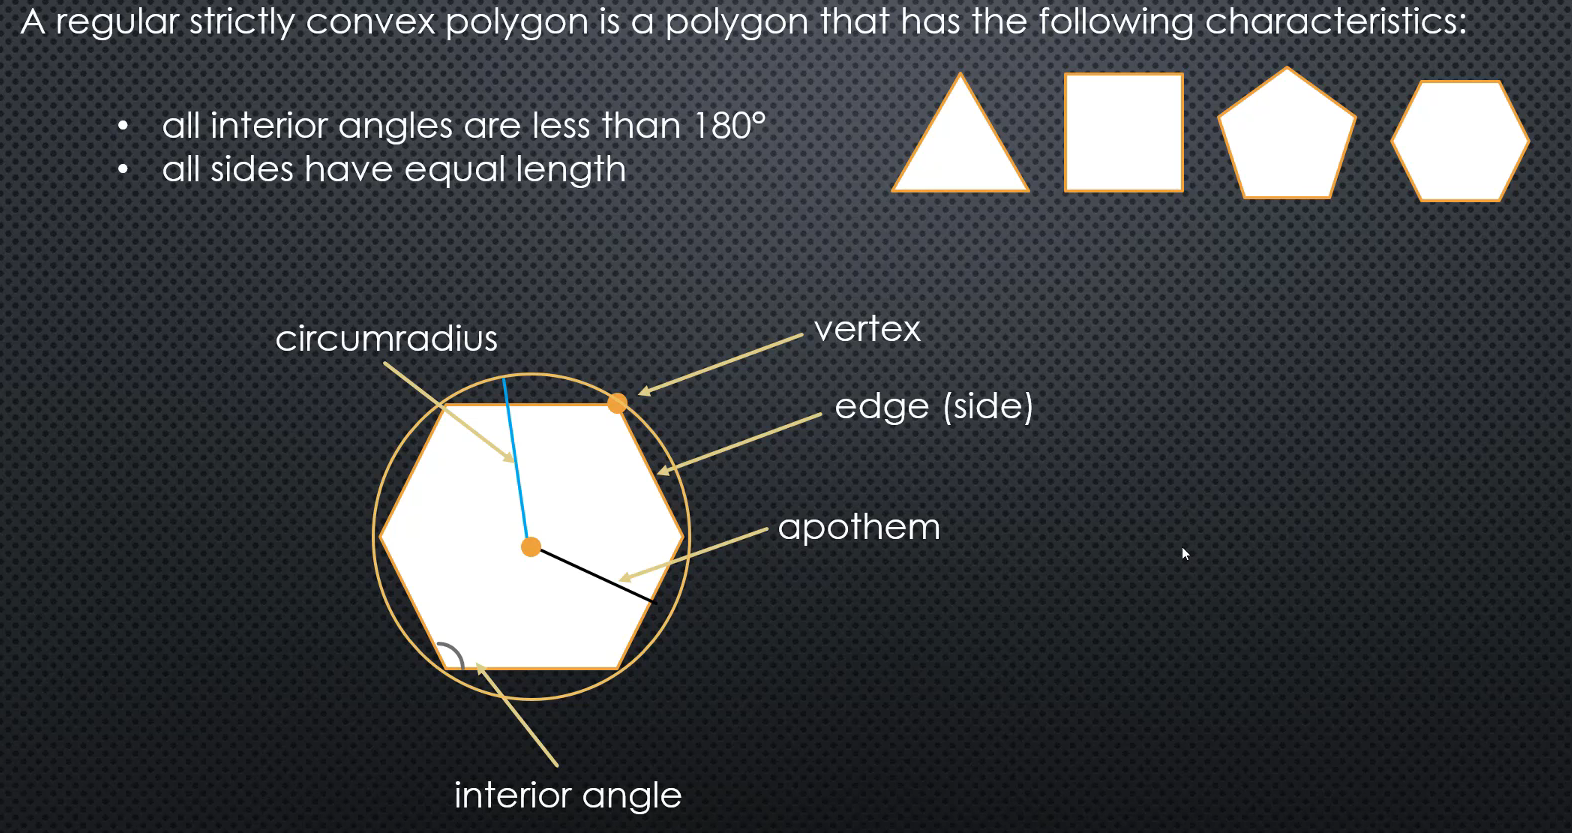
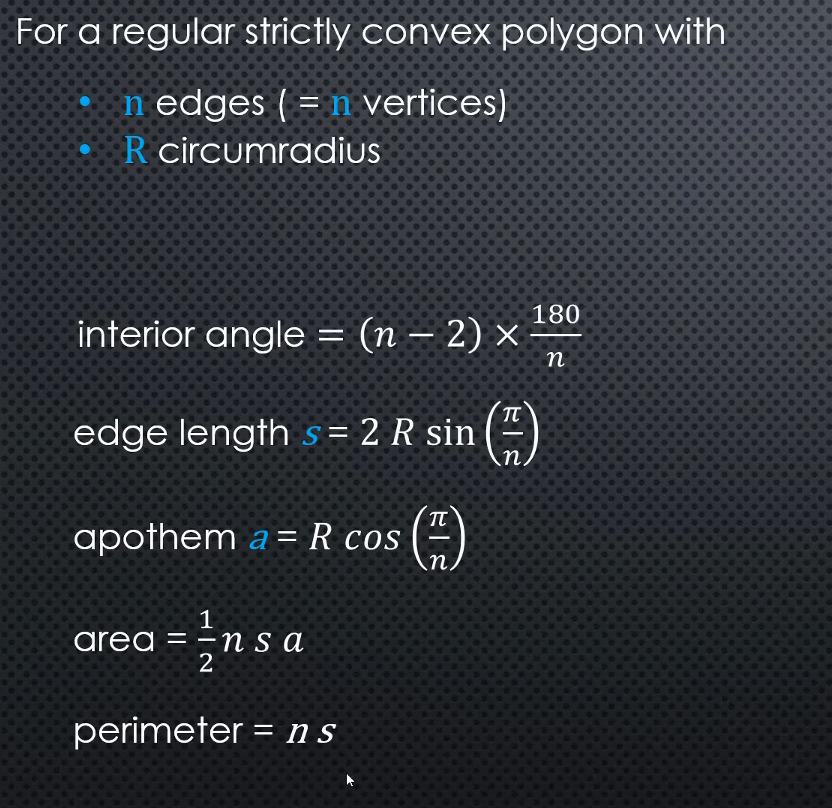

## Polygon Class Requirements
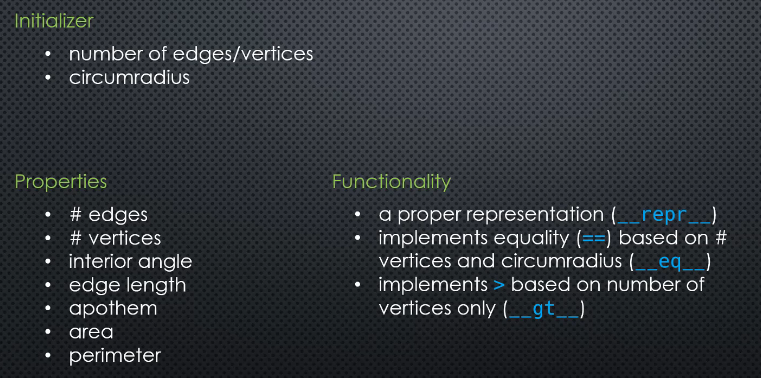

In [62]:
import math


class Polygon:
    def __init__(self, n, R):
        if not isinstance(n, int) or n < 3:
            raise ValueError('n parameter has to be an integer larger than or equal to 3')
        if not isinstance(R, (float, int)) or R <= 0:
            raise ValueError('R parameter has to be a postive real number')
        self._n = n
        self._R = R

    def __repr__(self):
        return f'Polygon(n={self._n}, R={self._R})'

    @property
    def count_vertices(self):
        return self._n

    @property 
    def count_edges(self):
        return self._n

    @property
    def circumradius(self):
        return self._R

    @property
    def interior_angle(self):
        return (self._n - 2) * 180 / self._n

    @property
    def side_length(self):
        return 2 * self._R * math.sin(math.pi / self._n)

    @property
    def apothem(self):
        return self._R * math.cos(math.pi / self._n)

    @property
    def area(self):
        return self._n / 2 * self.side_length * self.apothem

    @property
    def perimeter(self):
        return self._n * self.side_length
        
    def __eq__(self, other):
        if isinstance(other, Polygon):
            return self.count_edges == other.count_edges and self.circumradius == other.circumradius
        return NotImplemented

    def __gt__(self, other):
        if isinstance(other, Polygon):
            return self.count_edges > other.count_edges
        return NotImplemented
        

In [63]:
def test_polygon():

    try:
        p = Polygon(2, 10)
        assert False, 'Creating a Polygon with 2 sides: exception expected, but not received'
    except ValueError:
        pass

    try:
        p = Polygon(3, -1)
        assert False, 'Creating a Polygon with negative cirmuradius: exception expected, but not received'
    except ValueError:
        pass
    
    n = 3
    R = 1
    p = Polygon(n, R)
    assert str(p) == f'Polygon(n=3, R=1)', f'actual: {str(p)}'
    assert p.count_vertices == 3, f'actual: {p.count_vertices}, expected: {n}'
    assert p.count_edges == 3, f'actual: {p.count_edges}, expected: {n}'
    assert p.circumradius == 1, f'actual: {p.circumradius}, expected: {R}'
    assert p.interior_angle == 60, f'actual: {p.interior_angle}, expected: 60'
    assert p.side_length == math.sqrt(3), f'actual: {p.side_length}, expected: {math.sqrt(3)}'
    assert math.isclose(p.apothem, 0.5), f'actual: {p.apothem}, expected: 0.5'
    assert math.isclose(p.area, 3 / 4 * math.sqrt(3)), f'actual: {p.area}, expected: {3 / 4 * math.sqrt(3)}'
    assert math.isclose(p.perimeter, 3 * math.sqrt(3)), f'actual: {p.perimeter}, expected: {3 * math.sqrt(3)}'

    n1, n2, n3 = 5, 6, 6
    R1, R2, R3 = 1, 3, 3
    p1 = Polygon(n1, R1)
    p2 = Polygon(n2, R2)
    p3 = Polygon(n3, R3)
    assert p1 != p2
    assert p2 == p3
    assert not(p1 > p2)
    assert p2 > p1
    assert not(p3 < p2)
  

In [61]:
test_polygon()

## Polygons Custom Sequence Type Requirements
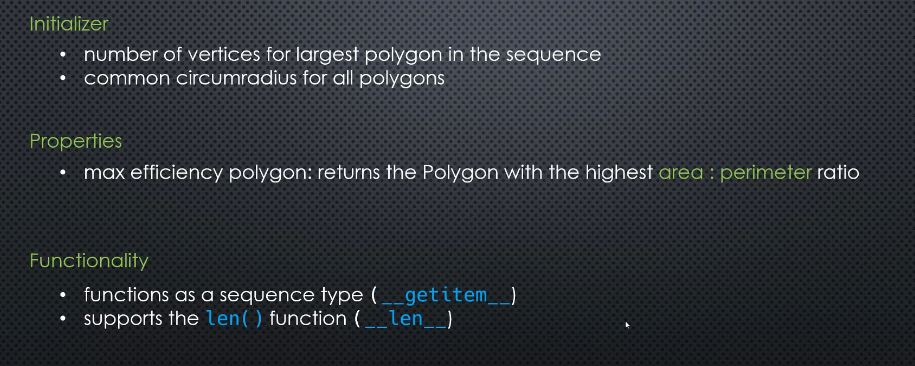

In [70]:
class Polygons:
    def __init__(self, m, R):
        if not isinstance(m, int) or m < 3:
            raise ValueError('m parameter has to be an integer larger than or equal to 3')
        if not isinstance(R, (float, int)) or R <= 0:
            raise ValueError('R parameter has to be a positive real number')
        self._m = m
        self._R = R
        self._polygons = [Polygon(i, R) for i in range(3, m + 1)]

    def __len__(self):
        return self._m - 2

    def __repr__(self):
        return f'Polygons(m={self._m}, R={self._R})'

    def __getitem__(self, s):
        return self._polygons[s]

    @property
    def max_efficiency_polygon(self):
        return sorted(self._polygons, key=lambda p: p.area / p.perimeter)[-1]
        

In [71]:
def test_polygons():
    try:
        p = Polygons(2, 10)
        assert False, 'Creating Polygons with max 2 sides: exception expected, but not received'
    except ValueError:
        pass

    try:
        p = Polygons(3, -1)
        assert False, 'Creating Polygons with negative cirmuradius: exception expected, but not received'
    except ValueError:
        pass

    m = 5
    R = 2
    polys = Polygons(m, R)
    assert str(polys) == 'Polygons(m=5, R=2)', f'actual: {str(polys)}'
    assert polys._polygons == [Polygon(3, 2), Polygon(4, 2), Polygon(5, 2)], \
        f'actual: {polys._polygons}, expected: [Polygon(3, 2), Polygon(4, 2), Polygon(5, 2)]'
    assert len(polys) == 3, f'actual: {len(polys)}, expected: 3'
    assert polys[1] == Polygon(4, 2), f'actual: {polys[1]}, expected: Polygon(4, 2)'
    assert polys.max_efficiency_polygon == Polygon(5, 2), f'actual: {polys.max_efficiency_polygon}, expected: Polygon(5, 2)'
    

In [72]:
test_polygons()